# Predicting loan defaults in real estate with neural networks

## Table of Contents
### <b> <a href='#chapter1'> 1. Data visualization</a>
### <b> <a href='#chapter1'> 2. Data preprocessing</a>
### <b> <a href='#chapter1'> 3. Splitting the data set</a>
### <b> <a href='#chapter1'> 4. Prediction with Neural Networks</a>
### <b> <a href='#chapter1'> 5. Prediction with logistic regression</a>
### <b> <a href='#chapter1'> 6. Prediction with Random Forest </a>
### <b> <a href='#chapter1'> 7. ROC-Curve </a>

## 1. Data visualization

In [1]:
# Import the library

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools

In [2]:
df = pd.read_csv('hmeq.csv')
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [3]:
df.dtypes

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

[After examining the data type we get:](udf_0)
- Only 'REASON' and 'JOB' are the categorical features.
- The other features are metric.

In [4]:
df['BAD'].value_counts()

0    4771
1    1189
Name: BAD, dtype: int64

In [5]:
# Ratio between the number of high-risk customers and the number of low-risk customers
print('Percentage of number of high risk customers:', 4771/5960*100,'%')
print('Percentage of number of customers with low risk:',1189/5960*100,'%')

Percentage of number of high risk customers: 80.0503355704698 %
Percentage of number of customers with low risk: 19.949664429530202 %


<AxesSubplot:title={'center':'BAD'}>

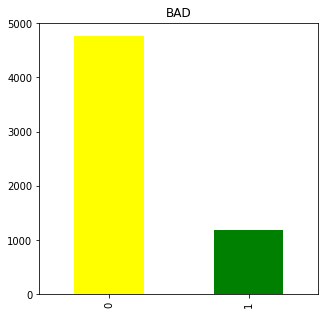

In [6]:
#Diagram BAD
df['BAD'].value_counts().plot.bar(title ='BAD', color=['yellow','green'], figsize = (5,5)) 

In [7]:
df['REASON'].value_counts()

DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64

<AxesSubplot:title={'center':'REASON'}>

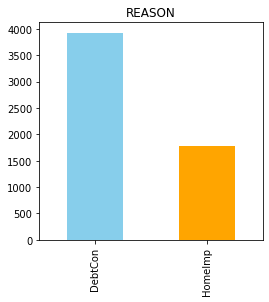

In [8]:
#Diagramm von REASON
df['REASON'].value_counts().plot.bar(title = 'REASON',color=['skyblue','orange'],figsize = (4,4)) 

In [9]:
df['JOB'].value_counts()

Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64

<AxesSubplot:title={'center':'JOB'}>

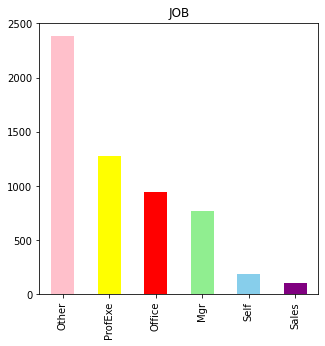

In [10]:
# Diagramm von JOB
df['JOB'].value_counts().plot.bar(title = 'JOB',color=['pink','yellow','red','lightgreen','skyblue','purple'],figsize = (5,5)) 

<AxesSubplot:title={'center':'LOAN'}, ylabel='Frequency'>

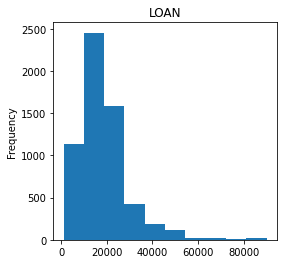

In [11]:
# Diagramm von anderen Merkmalen
df['LOAN'].plot.hist(title = 'LOAN',figsize = (4,4)) 

<AxesSubplot:title={'center':'MORTDUE'}, ylabel='Frequency'>

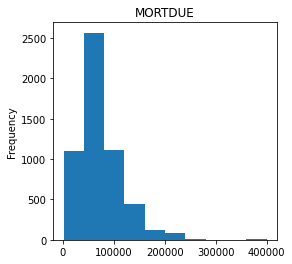

In [12]:
df['MORTDUE'].plot.hist(title = 'MORTDUE',figsize = (4,4))

<AxesSubplot:title={'center':'VALUE'}, ylabel='Frequency'>

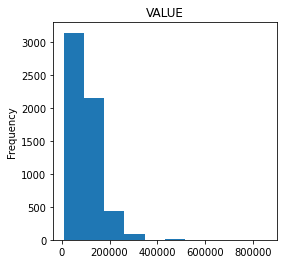

In [13]:
df['VALUE'].plot.hist(title = 'VALUE',figsize = (4,4))

<AxesSubplot:title={'center':'YOJ'}, ylabel='Frequency'>

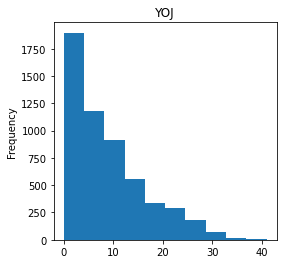

In [14]:
df['YOJ'].plot.hist(title = 'YOJ',figsize = (4,4))

<AxesSubplot:title={'center':'DEROG'}, ylabel='Frequency'>

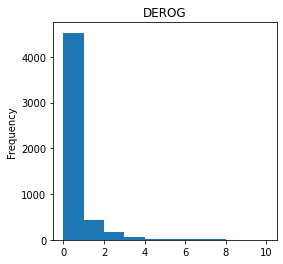

In [15]:
df['DEROG'].plot.hist(title = 'DEROG',figsize = (4,4))

<AxesSubplot:title={'center':'DELINQ'}, ylabel='Frequency'>

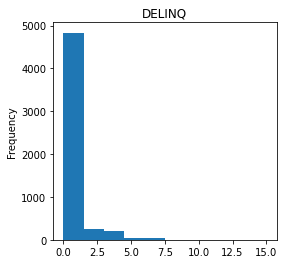

In [16]:
df['DELINQ'].plot.hist(title ='DELINQ',figsize = (4,4))

<AxesSubplot:title={'center':'CLAGE'}, ylabel='Frequency'>

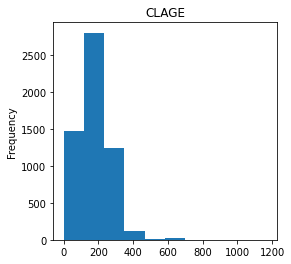

In [17]:
df['CLAGE'].plot.hist(title = 'CLAGE',figsize = (4,4))

<AxesSubplot:title={'center':'NINQ'}, ylabel='Frequency'>

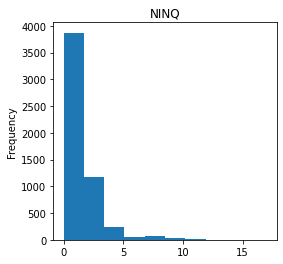

In [18]:
df['NINQ'].plot.hist(title = 'NINQ',figsize = (4,4))

<AxesSubplot:title={'center':'CLNO'}, ylabel='Frequency'>

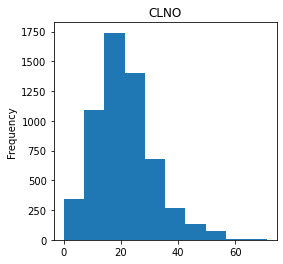

In [19]:
df['CLNO'].plot.hist(title = 'CLNO',figsize = (4,4))

<AxesSubplot:title={'center':'DEBTINC'}, ylabel='Frequency'>

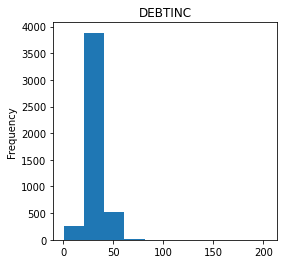

In [20]:
df['DEBTINC'].plot.hist(title = 'DEBTINC',figsize = (4,4))

## 2. Datenvorverarbeitung

<AxesSubplot:>

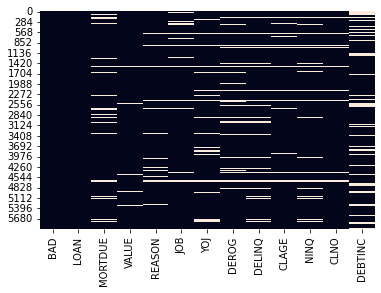

In [21]:
# Checking for missing values
import seaborn as sns
sns.heatmap(df.isnull(), cbar = False)

Text(0.5, 1.0, 'Number of missing values for each variable')

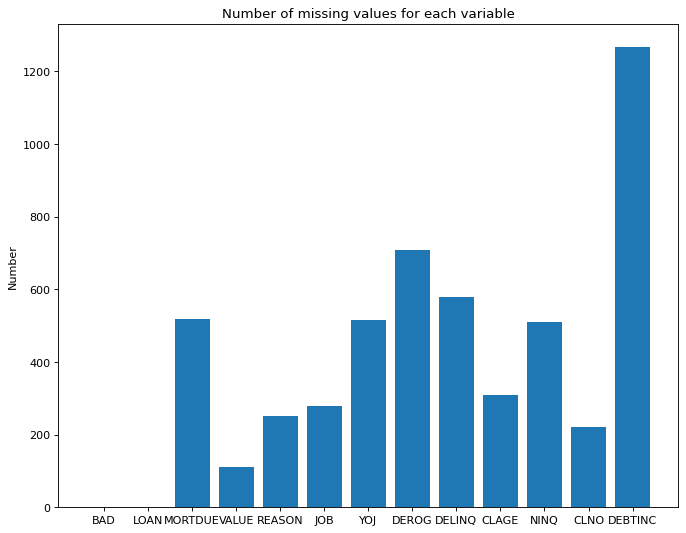

In [22]:
# Number of missing values for each variable

df.columns
plt.figure(figsize=(10, 8), dpi=80)
plt.bar(df.columns,height=np.sum(df.isnull()))
plt.ylabel("Number")
plt.title("Number of missing values for each variable")

In [23]:
# Remove the rows where the number of missing values is >=6
df=df[np.sum(df.isnull(),axis=1) <6]
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [24]:
# Removing the missing values for each variable

catcols= ['REASON','JOB']
for col in catcols:
    df[col].fillna(df[col].mode()[0],inplace=True)
    
numcols=['LOAN','MORTDUE', 'VALUE', 'YOJ', 'DELINQ','DEROG','CLAGE', 'NINQ','CLNO','DEBTINC']
for col in numcols:
    df[col].fillna(df[col].median(),inplace=True)

df.isna().sum() 

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

<AxesSubplot:>

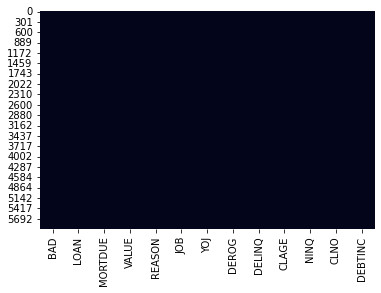

In [25]:
sns.heatmap(df.isnull(), cbar = False)

In [26]:
# Encoding of categorical data variable 'REASON'
pd.get_dummies(df['REASON']) 

,DebtCon,HomeImp
0,0,1
1,0,1
2,0,1
4,0,1
5,0,1
...,...,...
5955,1,0
5956,1,0
5957,1,0
5958,1,0


In [27]:
# Encoding of categorical data variable 'JOB'
pd.get_dummies(df['JOB']) 

,Mgr,Office,Other,ProfExe,Sales,Self
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
4,0,1,0,0,0,0
5,0,0,1,0,0,0
...,...,...,...,...,...,...
5955,0,0,1,0,0,0
5956,0,0,1,0,0,0
5957,0,0,1,0,0,0
5958,0,0,1,0,0,0


In [28]:
# New dataset

df2 = pd.get_dummies(df) 
df2

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,34.917407,0,1,0,0,1,0,0,0
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,34.917407,0,1,0,0,1,0,0,0
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,34.917407,0,1,0,0,1,0,0,0
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,34.917407,0,1,0,1,0,0,0,0
5,1,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347,1,0,0,0,1,0,0,0
5956,0,89000,54576.0,92937.0,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971,1,0,0,0,1,0,0,0
5957,0,89200,54045.0,92924.0,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590,1,0,0,0,1,0,0,0
5958,0,89800,50370.0,91861.0,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882,1,0,0,0,1,0,0,0


## 2. Splitting the data set

In [29]:
# Split into X and Y

X = df2.drop(columns=["BAD"]) 
Y = df2["BAD"] 

In [30]:
# Split in the training data and test data

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 30)

In [31]:
print(X_train.shape)
print(Y_train.shape)

(4614, 18)
(4614,)


In [32]:
print(X_test.shape)
print(Y_test.shape)

(1154, 18)
(1154,)


In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train= pd.DataFrame(X_train, index=Y_train.index, columns=X.columns)

X_test = sc.transform(X_test)
X_test= pd.DataFrame(X_test, index=Y_test.index, columns=X.columns)

In [34]:
X_train

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
3247,-0.121812,-0.526828,-0.669792,-0.657609,-0.287535,-0.386823,-0.760303,-0.704531,-0.435019,-0.257133,-1.530051,1.530051,-0.391054,2.222211,-0.865478,-0.527367,-0.141046,-0.186443
5226,0.854566,-0.043497,0.292284,-0.657609,-0.287535,-0.386823,-1.065665,0.486204,1.044328,0.805860,0.653573,-0.653573,-0.391054,-0.450002,1.155431,-0.527367,-0.141046,-0.186443
2041,-0.503487,-0.343998,-0.337068,-0.251296,-0.287535,-0.386823,1.350319,-0.704531,-0.139150,0.109528,-1.530051,1.530051,-0.391054,-0.450002,1.155431,-0.527367,-0.141046,-0.186443
4146,0.259863,1.879498,-0.222975,-0.251296,2.213287,3.310330,-0.157277,-0.704531,2.129183,0.535484,0.653573,-0.653573,-0.391054,-0.450002,-0.865478,-0.527367,-0.141046,5.363557
2342,-0.405849,-0.296837,-0.305772,-1.063921,-0.287535,-0.386823,-0.050132,0.486204,0.156720,2.221605,-1.530051,1.530051,2.557189,-0.450002,-0.865478,-0.527367,-0.141046,-0.186443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,-0.831905,-1.201537,-1.093382,-0.793046,-0.287535,-0.386823,-0.063533,-0.109164,-0.139150,0.649508,0.653573,-0.653573,-0.391054,-0.450002,1.155431,-0.527367,-0.141046,-0.186443
5452,1.218489,-0.524211,0.067644,-0.793046,-0.287535,-0.386823,-0.076697,0.486204,0.255343,0.325660,0.653573,-0.653573,-0.391054,2.222211,-0.865478,-0.527367,-0.141046,-0.186443
548,-1.000552,0.334417,0.300195,-0.522171,-0.287535,-0.386823,0.185615,-0.109164,0.551212,-1.027909,-1.530051,1.530051,-0.391054,-0.450002,-0.865478,1.896211,-0.141046,-0.186443
4039,0.215483,-0.287780,-0.327724,1.373954,-0.287535,-0.386823,0.497640,-0.704531,-0.040527,-0.191601,0.653573,-0.653573,-0.391054,-0.450002,1.155431,-0.527367,-0.141046,-0.186443


In [35]:
X_test

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
3266,-0.112935,-1.112010,-0.336334,-0.251296,-0.287535,-0.386823,0.821902,-0.704531,2.819545,1.317455,-1.530051,1.530051,-0.391054,-0.450002,1.155431,-0.527367,-0.141046,-0.186443
3478,-0.033050,-0.145949,-0.123081,-0.793046,-0.287535,-0.386823,-0.293745,-0.704531,0.353966,-1.549243,0.653573,-0.653573,-0.391054,2.222211,-0.865478,-0.527367,-0.141046,-0.186443
3522,-0.006421,-1.158198,-0.710431,0.425891,-0.287535,-0.386823,-1.571383,-0.704531,-1.322627,0.925755,-1.530051,1.530051,-0.391054,-0.450002,1.155431,-0.527367,-0.141046,-0.186443
3846,0.126721,0.702602,0.648777,0.155016,-0.287535,-0.386823,-0.200141,-0.109164,0.156720,0.069208,-1.530051,1.530051,-0.391054,-0.450002,-0.865478,1.896211,-0.141046,-0.186443
5666,1.893078,5.956498,5.457724,1.780266,-0.287535,-0.386823,0.758797,4.058411,1.241574,0.109528,0.653573,-0.653573,-0.391054,-0.450002,-0.865478,1.896211,-0.141046,-0.186443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3671,0.055712,0.599084,0.427473,-1.199359,-0.287535,0.537465,1.465368,-0.109164,-0.139150,1.261020,-1.530051,1.530051,2.557189,-0.450002,-0.865478,-0.527367,-0.141046,-0.186443
5047,0.730300,0.026203,0.427595,-1.199359,-0.287535,-0.386823,1.632997,-0.704531,0.156720,0.578262,0.653573,-0.653573,-0.391054,2.222211,-0.865478,-0.527367,-0.141046,-0.186443
4678,0.526148,-0.753993,-0.712317,1.373954,-0.287535,-0.386823,0.033796,0.486204,0.058097,0.109528,0.653573,-0.653573,-0.391054,2.222211,-0.865478,-0.527367,-0.141046,-0.186443
308,-1.124818,-0.205016,-0.142029,2.322016,0.962876,2.386042,-1.304974,-0.109164,1.241574,0.109528,0.653573,-0.653573,-0.391054,-0.450002,1.155431,-0.527367,-0.141046,-0.186443


## 3. Predicting Loan Defaults with Neural Networks

In [36]:
import tensorflow 
import tensorflow.keras.models as tmodels
import tensorflow.keras.layers as tlayers
import tensorflow.keras.optimizers as optimizers
import keras_tuner
from tensorflow import keras

In [37]:
def model_NN(hp): 

  model = tmodels.Sequential()
  hp_units = hp.Int('units', min_value=10, max_value=50, step=5)     # Hinzufügen Hidden Layer 1
  model.add(tlayers.Dense(hp_units, activation='relu', input_shape=(18,)))  # Hinzufügen Input Layer

  hp_dropout_rate = hp.Choice('drop_out_rate', values=[0.02, 0.05, 0.1, 0.2])  # Hinzufügen Dropout
  model.add(tlayers.Dropout(hp_dropout_rate)) 

  hp_units2 = hp.Int('units2', min_value=5, max_value=30, step=5)  # Hinzufügen Hidden Layer 2
  model.add(tlayers.Dense(hp_units2, activation='relu')) 
  model.add(tlayers.Dropout(hp_dropout_rate)) 
  model.add(tlayers.Dense(1, activation='sigmoid'))                # Hinzufügen Output Layer

  hp_learning_rate = hp.Choice('learning_rate', values=[1e-4, 1e-3, 1e-2]) 
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss="binary_crossentropy",
                metrics=['accuracy'])
  return model


In [38]:
# Finding the optimal parameters

from sklearn.model_selection import RandomizedSearchCV
tuner = keras_tuner.RandomSearch(model_NN, objective='val_accuracy', max_trials=15)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [39]:
stop_early = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(X_train, Y_train, epochs=50,validation_split=0.2,callbacks=[stop_early])

INFO:tensorflow:Oracle triggered exit


In [40]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The hyperparameter search is completed. 
The optimal number of units in the first hidden layer is {best_hps.get('units')}, 
The optimal number of units in the second hidden layer is {best_hps.get('units2')} ,
The optimal drop out reate is {best_hps.get('drop_out_rate')}   
And the optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is completed. 
The optimal number of units in the first hidden layer is 45, 
The optimal number of units in the second hidden layer is 30 ,
The optimal drop out reate is 0.05   
And the optimal learning rate for the optimizer is 0.01.



In [41]:
# Training and Adjusting Model

model = tuner.hypermodel.build(best_hps)
story = model.fit(X_train, Y_train,batch_size = 10, epochs=50,validation_split=0.2,callbacks=[stop_early])

Epoch 1/50
370/370 [==============================] - 2s 4ms/step - loss: 0.3979 - accuracy: 0.8442 - val_loss: 0.4017 - val_accuracy: 0.8321
Epoch 2/50
370/370 [==============================] - 1s 4ms/step - loss: 0.3608 - accuracy: 0.8567 - val_loss: 0.3833 - val_accuracy: 0.8451
Epoch 3/50
370/370 [==============================] - 2s 4ms/step - loss: 0.3416 - accuracy: 0.8678 - val_loss: 0.3724 - val_accuracy: 0.8494
Epoch 4/50
370/370 [==============================] - 2s 4ms/step - loss: 0.3300 - accuracy: 0.8735 - val_loss: 0.3689 - val_accuracy: 0.8472
Epoch 5/50
370/370 [==============================] - 2s 4ms/step - loss: 0.3210 - accuracy: 0.8702 - val_loss: 0.3689 - val_accuracy: 0.8537
Epoch 6/50
370/370 [==============================] - 2s 4ms/step - loss: 0.3177 - accuracy: 0.8754 - val_loss: 0.3495 - val_accuracy: 0.8602
Epoch 7/50
370/370 [==============================] - 2s 4ms/step - loss: 0.2962 - accuracy: 0.8846 - val_loss: 0.3761 - val_accuracy: 0.8657
Epoch 

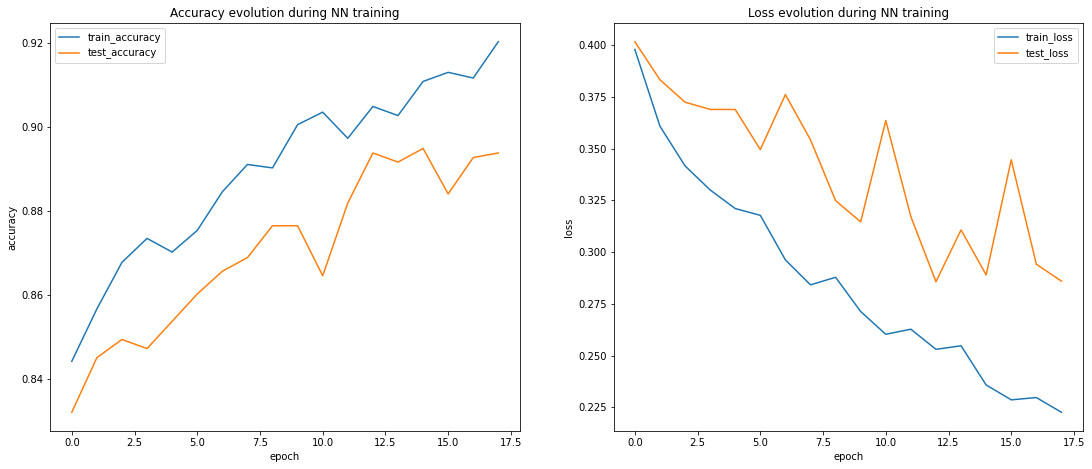

In [42]:
def show_history(story):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18.5, 7.5)
    ax1.plot(story.history['accuracy'])
    ax1.plot(story.history['val_accuracy'])
    ax1.set(xlabel='epoch', ylabel='accuracy')
    ax1.legend(['train_accuracy', 'test_accuracy'], loc='best')
    ax1.set_title('Accuracy evolution during NN training')
    
    ax2.plot(story.history['loss'])
    ax2.plot(story.history['val_loss'])
    ax2.set(xlabel='epoch', ylabel='loss')
    ax2.legend(['train_loss', 'test_loss'], loc='best')
    ax2.set_title('Loss evolution during NN training')
    plt.show()

show_history(story)

In [43]:
#forecast

prob_nn = model.predict(X_test)
Y_pred_nn = (prob_nn>= 0.5)

37/37 [==============================] - 0s 2ms/step


In [44]:
from sklearn.metrics import accuracy_score,  classification_report, f1_score #confusion_matrix,
print("Accuracy: {0:.2f}%".format(accuracy_score(Y_test, Y_pred_nn)*100))
print("-"*80)
print("Evaluation\n")
print(classification_report(Y_test, Y_pred_nn, digits=4))

Accuracy: 88.73%
--------------------------------------------------------------------------------
Evaluation

              precision    recall  f1-score   support

           0     0.8866    0.9848    0.9331       921
           1     0.8931    0.5021    0.6429       233

    accuracy                         0.8873      1154
   macro avg     0.8899    0.7435    0.7880      1154
weighted avg     0.8879    0.8873    0.8745      1154



## 4. Predicting Loan Defaults Using Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid_search = [{"C":[0.3,0.5,0.6,0.7,1]}] 
model2 = GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=5000, penalty='l1',solver='liblinear'),
             n_jobs=-1, param_grid=[{'C': [0.3, 0.5, 0.6, 0.7, 1]}],
             scoring='f1')
model2.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=5000, penalty='l1',
                                          solver='liblinear'),
             n_jobs=-1, param_grid=[{'C': [0.3, 0.5, 0.6, 0.7, 1]}],
             scoring='f1')

In [47]:
print("The best hyperparmeter is",model2.best_params_)

The best hyperparmeter is {'C': 0.6}


In [48]:
prob_logit = model2.predict_proba(X_test)[:,1]
Y_pred_logit = model2.predict(X_test)

In [49]:
print("Accuracy: {0:.2f}%".format(accuracy_score(Y_test, Y_pred_logit)*100))
print("-"*80)
print("Evaluation\n")
print(classification_report(Y_test, Y_pred_logit, digits=4))

Accuracy: 83.88%
--------------------------------------------------------------------------------
Evaluation

              precision    recall  f1-score   support

           0     0.8503    0.9685    0.9056       921
           1     0.7238    0.3262    0.4497       233

    accuracy                         0.8388      1154
   macro avg     0.7871    0.6473    0.6776      1154
weighted avg     0.8248    0.8388    0.8135      1154



## 5. Predicting Loan Defaults with Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=100)
model3.fit(X_train, Y_train)
prob_random = model3.predict_proba(X_test)[:,1]
Y_pred_random = model3.predict(X_test)

In [51]:
print("Accuracy: {0:.2f}%".format(accuracy_score(Y_test, Y_pred_random)*100))
print("-"*80)
print("Evaluation\n")
print(classification_report(Y_test, Y_pred_random, digits=4))

Accuracy: 91.85%
--------------------------------------------------------------------------------
Evaluation

              precision    recall  f1-score   support

           0     0.9276    0.9739    0.9502       921
           1     0.8717    0.6996    0.7762       233

    accuracy                         0.9185      1154
   macro avg     0.8996    0.8368    0.8632      1154
weighted avg     0.9163    0.9185    0.9151      1154



## 6. ROC Kurve

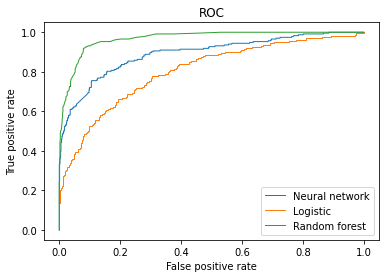

In [52]:
# ROC 
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(Y_test, prob_nn)
plt.plot(fpr, tpr, lw=1,label='Neural network')
fpr, tpr, _ = roc_curve(Y_test, prob_logit)
plt.plot(fpr, tpr, lw=1,label='Logistic')
fpr, tpr, _ = roc_curve(Y_test, prob_random)
plt.plot(fpr, tpr, lw=1,label='Random forest')
plt.xlabel('False positive rate') 
plt.ylabel('True positive rate')
plt.legend(loc="best")
plt.title("ROC")
plt.show()